In [28]:
#Data preprocessing
import pandas as pd
x=pd.read_csv('C:/Users/rsroh/Downloads/mnist-in-csv/mnist_train.csv')
y = x.iloc[:, :1]
data = x.iloc[:, 1:]
print(y.shape)
print(data.shape)
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(60000, 1)
(60000, 784)
(60000, 784)


In [24]:
#finding covar Matrix
import numpy as np
covar_matrix=np.matmul(standardized_data.T,standardized_data)

In [25]:
#Eigen values and Eigen Vectors
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
vectors=vectors.T
print(vectors.shape)

(2, 784)


In [29]:
#projecting on plane
import matplotlib.pyplot as plt
new_cord=np.matmul(vectors,standardized_data.T)
print(new_cord.shape)

(2, 60000)


In [33]:
new_cord=np.vstack((new_cord,y.T)).T
df=pd.DataFrame(data=new_cord,columns=("1st principal","2nd principal","label"))
print(df.head)

<bound method NDFrame.head of        1st principal  2nd principal  label
0          -4.814790      -0.922159    5.0
1          -7.754403       8.708977    0.0
2           9.431338       2.328389    4.0
3          -3.746318      -6.582173    1.0
4           3.133297      -5.183251    9.0
5          -3.068366       2.198402    2.0
6           0.823079      -6.773344    1.0
7          -5.406264       1.926909    3.0
8           0.191810      -7.822335    1.0
9          -4.726425      -3.227626    4.0
10         -2.348115      -3.147635    3.0
11         -4.242027      -4.062253    5.0
12         10.300184       4.026931    3.0
13         -3.997131       0.949713    6.0
14         -0.317712      -7.608035    1.0
15         -0.471620      -2.985103    7.0
16         -0.545766       1.951605    2.0
17         -6.483935      -4.334300    8.0
18         -1.195193      -3.362694    6.0
19         -2.098029      -8.127626    9.0
20         13.589312       5.531879    4.0
21         -8.308396    

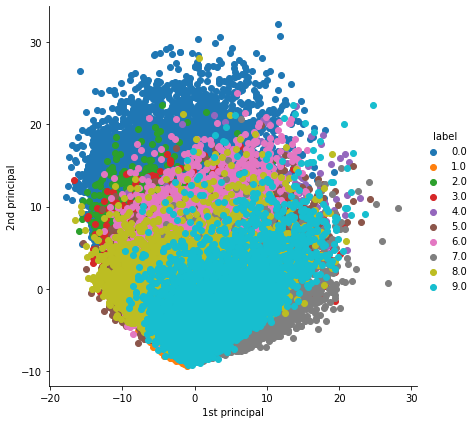

In [36]:
import seaborn as sns
sns.FacetGrid(df,hue='label',size=6).map(plt.scatter,"1st principal","2nd principal").add_legend()
plt.show()

In [40]:
#PCA for dimensionality reduction
from sklearn import decomposition
pca=decomposition.PCA()
pca.n_components=300
pca_data=pca.fit_transform(standardized_data)
print(pca.explained_variance_ratio_)


[0.05646717 0.04078272 0.0373938  0.02885115 0.02521109 0.0219427
 0.01923344 0.01745799 0.01535092 0.0140172  0.01341743 0.01203742
 0.0111457  0.01089924 0.01028649 0.00994487 0.00936383 0.00921046
 0.00893437 0.00869913 0.00827363 0.00803417 0.00764846 0.00741772
 0.00715293 0.00691847 0.00684136 0.00656675 0.00631677 0.0061292
 0.00596255 0.00587716 0.00571592 0.00562307 0.00554682 0.00538418
 0.00531182 0.00519606 0.00508211 0.00480006 0.00476456 0.00469139
 0.00454349 0.00451346 0.00446963 0.00443383 0.00438215 0.00430382
 0.00426878 0.00423647 0.00404696 0.00399447 0.00397456 0.00393821
 0.00385814 0.00379043 0.00375403 0.00370776 0.00364944 0.00359301
 0.00352382 0.00347794 0.00344411 0.00339868 0.00335955 0.00334886
 0.00331864 0.00323026 0.00316277 0.00313244 0.00310731 0.00307243
 0.00304914 0.00302717 0.00299485 0.00297761 0.00295052 0.00290438
 0.00286856 0.00285678 0.00283398 0.00282627 0.00279551 0.00279305
 0.00278519 0.00277455 0.00275901 0.00274227 0.00271411 0.002692